## Patterns in Boron Geochemistry

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from uncertainties import unumpy as unp
from b_funks import load
from b_funks.helpers import make_figpath

nom = unp.nominal_values
err = unp.std_devs

plt.rcParams['figure.dpi'] = 150

In [2]:
dat = load.b_data()

In [ ]:
dat

In [3]:
# change these three to vary the KB denominator

# BT / DIC
KB_num = 'BT'
KB_denom = 'DIC'
ylabel = r'$K_B ~ \left(\frac{B_T}{DIC}\right)$'
fname = 'EffectsPlot_BT_DIC.pdf'

# # BT / HCO3
# KB_num = 'BT'
# KB_denom = 'HCO3'
# ylabel = r'$K_B ~ \left(\frac{B_T}{HCO_3^-}\right)$'
# fname = 'EffectsPlot_BT_HCO3.pdf'

# # BO4 / CO3
# KB_num = 'BO4'
# KB_denom = 'CO3'
# ylabel = r'$K_B ~ \left(\frac{B(OH)_4^-}{CO_3^{2-}}\right)$'
# fname = 'EffectsPlot_BO4_CO3.pdf'

# # BO4 / HCO3
# KB_num = 'BO4'
# KB_denom = 'HCO3'
# ylabel = r'$K_B ~ \left(\frac{B(OH)_4^-}{HCO_3^{-}}\right)$'
# fname = 'EffectsPlot_BO4_HCO3.pdf'

# # BO4 / DIC
# KB_num = 'BO4'
# KB_denom = 'DIC'
# ylabel = r'$K_B ~ \left(\frac{B(OH)_4^-}{DIC}\right)$'
# fname = 'EffectsPlot_BO4_DIC.pdf'

denom = dat.csys_mid[KB_num] / dat.csys_mid[KB_denom]


# # BO4 / sqrt(CO3)
# KB_num = 'BO4'
# KB_denom = 'CO3'
# denom = dat.csys_mid[KB_num] / dat.csys_mid[KB_denom]**0.5
# ylabel = r'$K_B ~ \left(\frac{B(OH)_4^-}{[CO_3^{2-}]^{0.5}}\right)$'
# fname = 'EffectsPlot_BO4_sqrtCO3.pdf'

In [4]:
numer = unp.uarray(nom(dat.loc[:,('Measured', 'B/Caf')]), dat.Uncertainties.ci95)
y = numer / denom

y_nom = nom(y)
y_err = err(y)

In [5]:
xvars = {
    ('csys_mid', 'DIC'): 'DIC $(\mu mol~kg^{-1})$',
    ('csys_mid', 'pHtot'): '$pH_T$',
    ('csys_mid', 'CO3'): '$[CO_3^{2-}]$',
    ('csys_mid', 'del_CO3'): '$\Delta [CO_3^{2-}]$',
    ('csys_mid', 'Omega'): '$\Omega_{Cal}$',
    ('Measured', '[Mg]sw'): '$[Mg^{2+}]$',
    ('Measured', '[Ca]sw'): '$[Ca^{2+}]$',
}

# Does BT matter?

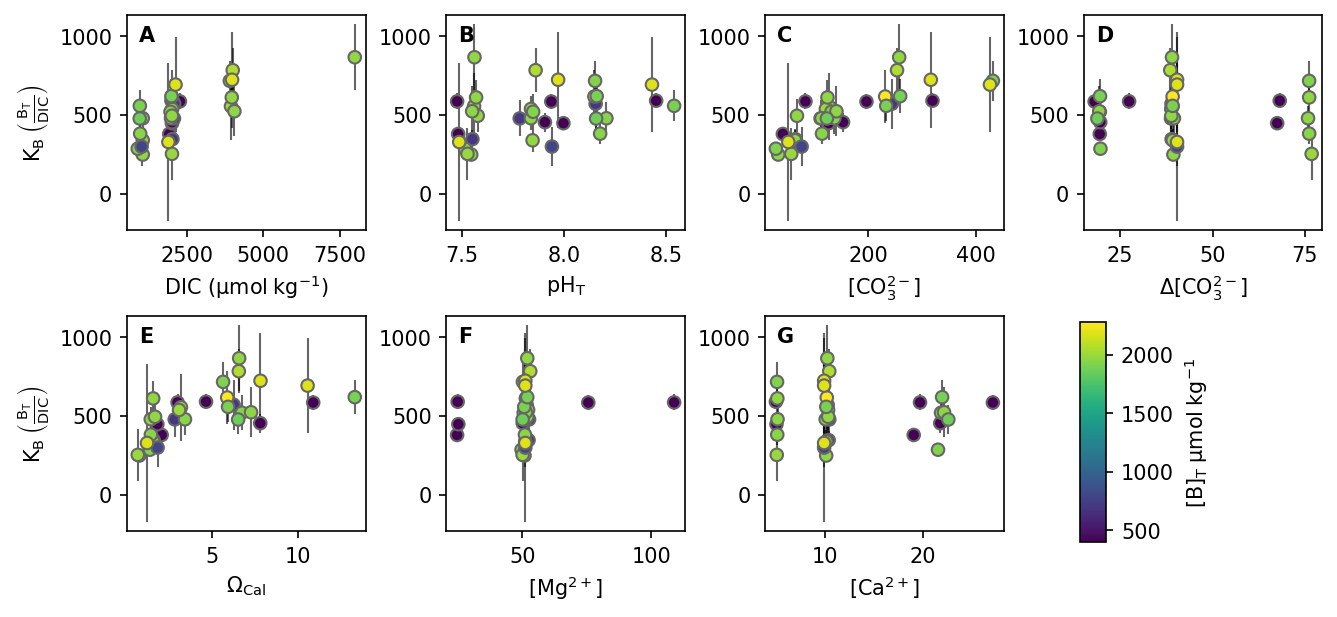

In [7]:
ncols = int(np.ceil(len(xvars) / 2))

ebarparams = {
    'lw': 0,
    'elinewidth': 1,
    'color': (0,0,0,0.6),
    'zorder': -1
}

scatterparams = {
    'lw': 1,
    'edgecolor': (.4, .4, .4)
}

fig, axs = plt.subplots(2, ncols, figsize=[ncols * 2.2, 2 * 2], constrained_layout=True)

for (xv, xlab), ax, letter in zip(xvars.items(), axs.flat, 'ABCDEFG'):
    x = dat.loc[:, xv]
    ma = ax.scatter(x, y_nom, c=dat.csys_mid.BT, **scatterparams)
    ax.errorbar(x, y_nom, y_err, **ebarparams)
    ax.set_xlabel(xlab)
    
    ax.text(0.05, 0.95, letter, ha='left', va='top', transform=ax.transAxes, weight='bold')
    
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(ylabel)
    
ax = axs[-1,-1]    
p = ax.get_position()
ax.set_visible(False)

cax = fig.add_axes([p.x0+0.08, p.y0, 0.02, p.height * 1.05])
fig.colorbar(ma, cax=cax, label='$[B]_T~\mu mol~kg^{-1}$')

fig.savefig(make_figpath('S2_BTinfluence.pdf'))

## Constant Conditions highlighted

In [8]:
from b_funks.helpers import constant_condition_index

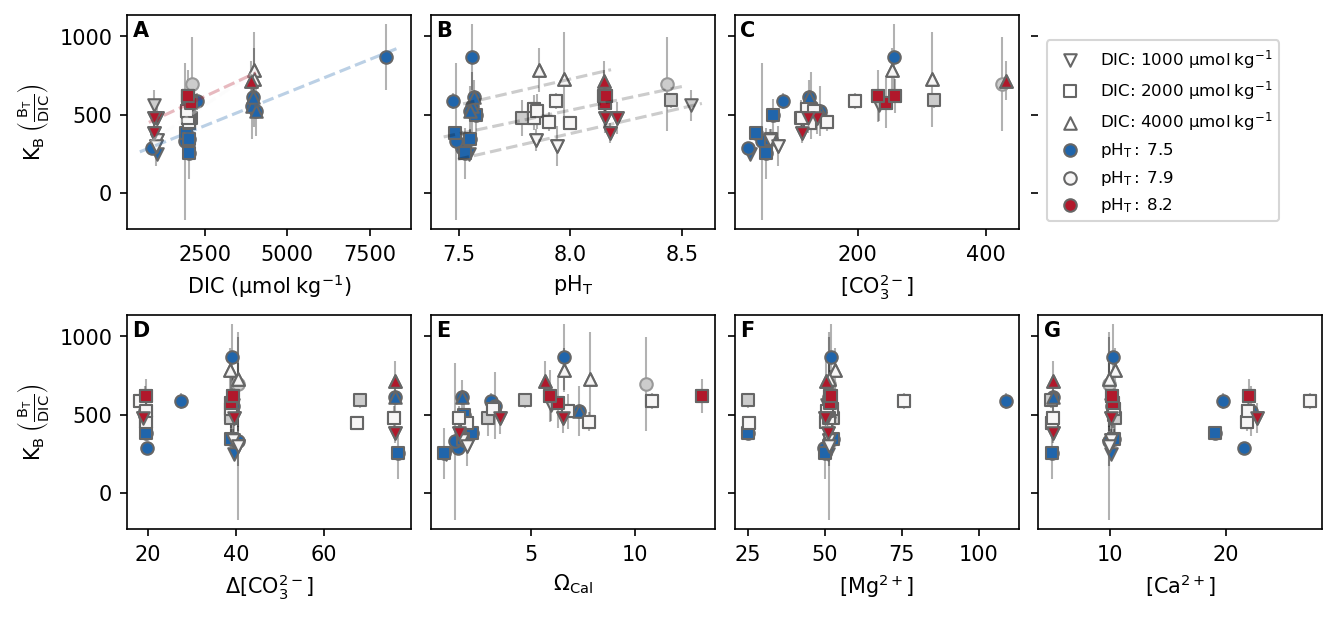

In [10]:
ncols = int(np.ceil(len(xvars) / 2))

ebarparams = {
    'lw': 0,
    'elinewidth': 1,
    'color': (0,0,0,0.3),
    'zorder': -2
}

bgparams = {
    'lw': 1,
    'edgecolor': (.6, .6, .6),
    'color': (.8,.8,.8),
    'zorder': -1
}

scatterparams = {
    'lw': 1,
    'edgecolor': (.4,.4,.4),
}

pHs = {
    (7.5, .1): plt.cm.RdBu_r(0.1),
    (7.9, .1): plt.cm.RdBu_r(0.5),
    (8.2, .1): plt.cm.RdBu_r(0.9),
}

DICs = {
    (1000, 100): 'v',
    (2000, 100): 's',
    (4000, 100): '^',
}

fig, axs = plt.subplots(2, ncols, figsize=[ncols * 2.2, 2 * 2], sharey=True, constrained_layout=True)

axs = np.concatenate([axs.flat[:3], axs.flat[4:], [axs.flat[3]]])

for (xv, xlab), ax, letter in zip(xvars.items(), axs.flat, 'ABCDEFG'):
    x = dat.loc[:, xv]
    ax.errorbar(x, y_nom, y_err, **ebarparams)
    ax.set_xlabel(xlab)
    
    ax.text(0.02, 0.97, letter, ha='left', va='top', transform=ax.transAxes, weight='bold')
    
    notgot = np.full(dat.shape[0], True)
    for pH, c in pHs.items():
        phind = constant_condition_index(dat, {('csys_mid', 'pHtot'): pH})
        for DIC, m in DICs.items():
            dicind = constant_condition_index(dat, {('csys_mid', 'DIC'): DIC})
            
            ind = phind & dicind
            ax.scatter(x[ind], y_nom[ind], **scatterparams, color=c, marker=m)
            notgot[ind] = False
            
            ind = notgot & phind
            ax.scatter(x[ind], y_nom[ind], **scatterparams, color=c)
            notgot[ind] = False
            
            ind = notgot & dicind
            ax.scatter(x[ind], y_nom[ind], **scatterparams, marker=m, color=bgparams['color'])
            notgot[ind] = False
            
    ax.scatter(x[notgot], y_nom[notgot], **bgparams)
    
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel(ylabel)
        
# draw some lines
ax = axs[0]
x = dat.loc[:, ('csys_mid', 'DIC')]
pad = 0.05
for pH, c in pHs.items():
    ind = constant_condition_index(dat, {('csys_mid', 'pHtot'): pH})
    # best fit line
    p = np.polyfit(x[ind], y_nom[ind], 1)
    rng = x[ind].max() - x[ind].min()
    xn = np.linspace(x[ind].min() - pad * rng, x[ind].max() + pad * rng, 20)
    yn = np.polyval(p, xn)
    ax.plot(xn, yn, color=c, alpha=0.3, zorder=2, ls='dashed')
    
ax = axs[1]
x = dat.loc[:, ('csys_mid', 'pHtot')]
pad = 0.05
for DIC, c in DICs.items():
    ind = constant_condition_index(dat, {('csys_mid', 'DIC'): DIC})
    # best fit line
    p = np.polyfit(x[ind], y_nom[ind], 1)
    rng = x[ind].max() - x[ind].min()
    xn = np.linspace(x[ind].min() - pad * rng, x[ind].max() + pad * rng, 20)
    yn = np.polyval(p, xn)
    ax.plot(xn, yn, color=(0,0,0,0.2), zorder=2, ls='dashed')

# legend
ax = axs[-1]
for DIC, m in DICs.items():
    ax.scatter([], [], marker=m, **scatterparams, facecolor='w', label=f'DIC: {DIC[0]}' + ' $\mu mol~kg^{-1}$')
for pH, c in pHs.items():
    ax.scatter([], [], color=c, **scatterparams, label='$pH_T:$ ' + f'{pH[0]}')
ax.legend(loc='lower left', fontsize=8)
# turn frame off
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
# ax.set_yticks([])

# fig.savefig(f'figs/{fname}')

fig.savefig(make_figpath(fname))

## 'No Effect' Lines

The solution variables in the $K_B$ denominator correlate with the x-axis variables in these plots. This will make it look like there is a pattern, even if B/Ca remains constant. Do the patterns we see in the data deviate from the 'no effect' lines?

In [11]:
import cbsyst as cb

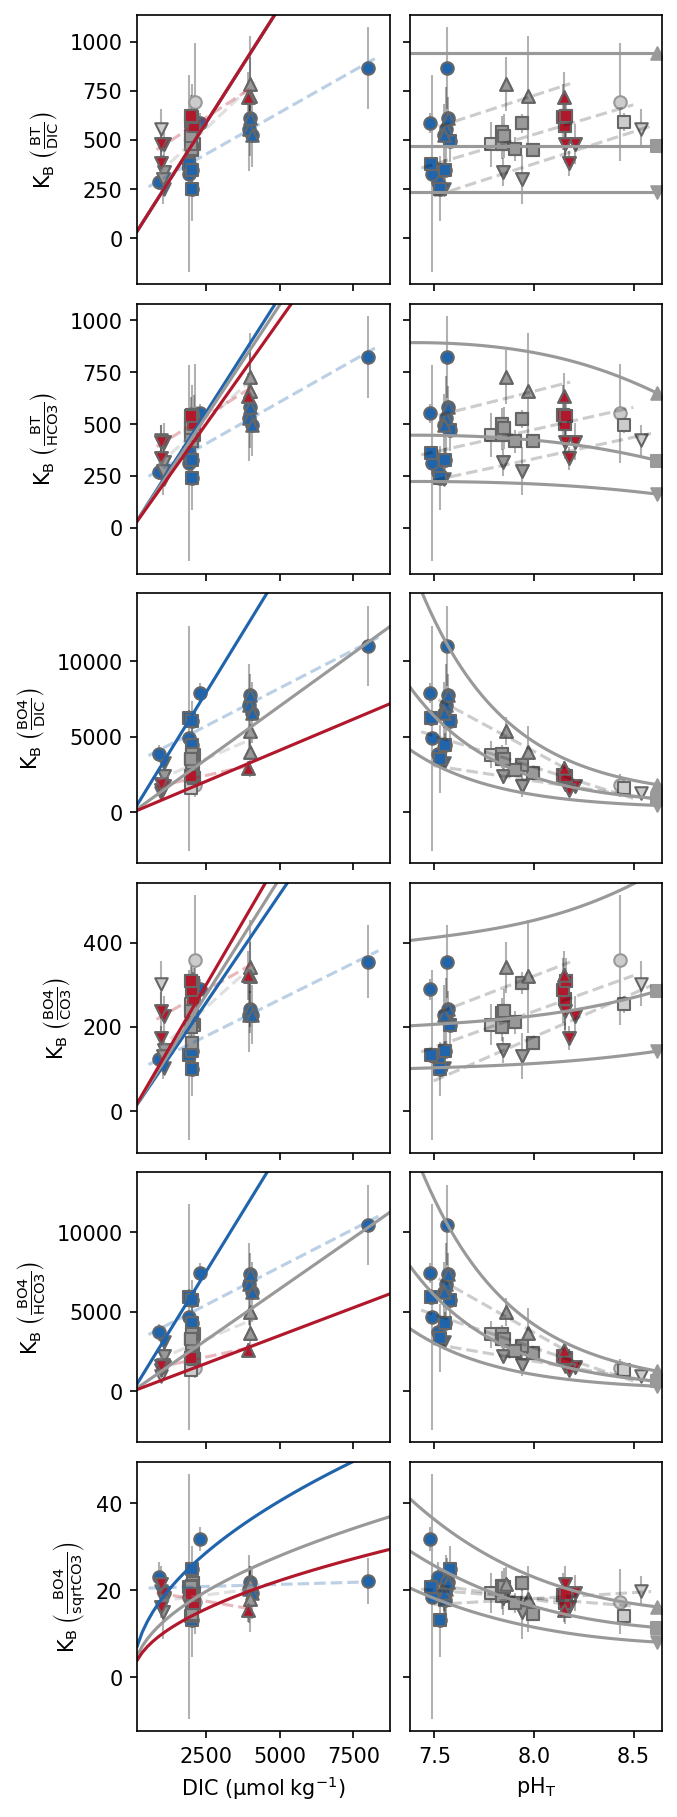

In [13]:
ncols = int(np.ceil(len(xvars) / 2))

ebarparams = {
    'lw': 0,
    'elinewidth': 1,
    'color': (0,0,0,0.3),
    'zorder': -2
}

bgparams = {
    'lw': 1,
    'edgecolor': (.6, .6, .6),
    'color': (.8,.8,.8),
    'zorder': -1
}

scatterparams = {
    'lw': 1,
    'edgecolor': (.4,.4,.4),
}

pHs = {
    (7.5, .1): plt.cm.RdBu_r(0.1),
    (7.9, .1): (.6, .6, .6),
    (8.2, .1): plt.cm.RdBu_r(0.9),
}

DICs = {
    (1000, 100): 'v',
    (2000, 100): 's',
    (4000, 100): '^',
}

denoms = [
    ('BT', 'DIC'),
    ('BT', 'HCO3'),
    ('BO4', 'DIC'),
    ('BO4', 'CO3'),
    ('BO4', 'HCO3'),
    ('BO4', 'sqrtCO3'),
]

fig, axes = plt.subplots(len(denoms), 2, figsize=[2 * 2.2, len(denoms) * 2], sharex='col', sharey='row', constrained_layout=True)

# axs = np.concatenate([axs.flat[:3], axs.flat[4:], [axs.flat[3]]])

for (KB_num, KB_denom), axs in zip(denoms, axes):
    
    if KB_denom == 'sqrtCO3':
        denom = dat.csys_mid[KB_num] / dat.csys_mid['CO3']**0.5
    else:
        denom = dat.csys_mid[KB_num] / dat.csys_mid[KB_denom]
    y = numer / denom
    y_nom = nom(y)
    y_err = err(y)

    for (xv, xlab), ax, letter in zip(xvars.items(), axs.flat, 'AB'):
        x = dat.loc[:, xv]
        ax.errorbar(x, y_nom, y_err, **ebarparams)
        
#         ax.text(0.02, 0.97, letter, ha='left', va='top', transform=ax.transAxes, weight='bold')

        notgot = np.full(dat.shape[0], True)
        for pH, c in pHs.items():
            phind = constant_condition_index(dat, {('csys_mid', 'pHtot'): pH})
            for DIC, m in DICs.items():
                dicind = constant_condition_index(dat, {('csys_mid', 'DIC'): DIC})

                ind = phind & dicind
                ax.scatter(x[ind], y_nom[ind], **scatterparams, color=c, marker=m)
                notgot[ind] = False

                ind = notgot & phind
                ax.scatter(x[ind], y_nom[ind], **scatterparams, color=c)
                notgot[ind] = False

                ind = notgot & dicind
                ax.scatter(x[ind], y_nom[ind], **scatterparams, marker=m, color=bgparams['color'])
                notgot[ind] = False

        ax.scatter(x[notgot], y_nom[notgot], **bgparams)

        if ax.get_subplotspec().is_first_col():
            ax.set_ylabel(r'$K_B~\left(\frac{' + KB_num + '}{' + KB_denom + r'} \right)$')
        if ax.get_subplotspec().is_last_row():
            ax.set_xlabel(xlab)

    # draw some lines
    ax = axs[0]
    x = dat.loc[:, ('csys_mid', 'DIC')]
    pad = 0.05
    for pH, c in pHs.items():
        ind = constant_condition_index(dat, {('csys_mid', 'pHtot'): pH})
        # best fit line
        p = np.polyfit(x[ind], y_nom[ind], 1)
        rng = x[ind].max() - x[ind].min()
        xn = np.linspace(x[ind].min() - pad * rng, x[ind].max() + pad * rng, 20)
        yn = np.polyval(p, xn)
        ax.plot(xn, yn, color=c, alpha=0.3, zorder=2, ls='dashed')

    ax = axs[1]
    x = dat.loc[:, ('csys_mid', 'pHtot')]
    pad = 0.05
    for DIC, c in DICs.items():
        ind = constant_condition_index(dat, {('csys_mid', 'DIC'): DIC})
        # best fit line
        p = np.polyfit(x[ind], y_nom[ind], 1)
        rng = x[ind].max() - x[ind].min()
        xn = np.linspace(x[ind].min() - pad * rng, x[ind].max() + pad * rng, 20)
        yn = np.polyval(p, xn)
        ax.plot(xn, yn, color=(0,0,0,0.2), zorder=2, ls='dashed')
        
# # legend
# ax = axs[-1]
# for DIC, m in DICs.items():
#     ax.scatter([], [], marker=m, **scatterparams, facecolor='w', label=f'DIC: {DIC[0]}' + ' $\mu mol~kg^{-1}$')
# for pH, c in pHs.items():
#     ax.scatter([], [], color=c, **scatterparams, label='$pH_T:$ ' + f'{pH[0]}')
# ax.legend(loc='lower left', fontsize=8)
# # turn frame off
# for spine in ax.spines.values():
#     spine.set_visible(False)
# ax.set_xticks([])
# # ax.set_yticks([])


#     Draw 'no effect' lines

mu_bca = np.mean(dat.loc[(dat.csys_mid.BT < 500) & (dat.csys_mid.BT > 300), ('Measured', 'B/Caf')].values).nominal_value

for (KB_num, KB_denom), axs in zip(denoms, axes):
    # DIC
    ax = axs[0]
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    for pH in [7.5, 7.9, 8.2]:
        sol = cb.CBsys(pHtot=pH, DIC=np.linspace(*ax.get_xlim()))
        sol['sqrtCO3'] = sol.CO3**0.5
        slope = mu_bca / (sol[KB_num] / sol[KB_denom])
        if len(slope) > 1:
            ax.plot(sol.DIC, slope, color=pHs[(pH, .1)])
        else:
            ax.axhline(slope, color=pHs[(pH, .1)])
    # pHtot
    ax = axs[1]
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    for DIC in [1000, 2000, 4000]:
        sol = cb.CBsys(pHtot=np.linspace(*ax.get_xlim()), DIC=DIC)
        sol['sqrtCO3'] = sol.CO3**0.5
        slope =  mu_bca / (sol[KB_num] / sol[KB_denom])
        if len(slope) > 1:
            ax.plot(sol.pHtot, slope, color=(.6,.6,.6))
            ax.scatter(sol.pHtot[-2], slope[-2], color=(.6,.6,.6), marker=DICs[(DIC, 100)])
        else:
            ax.axhline(slope, color=(.6,.6,.6))
            ax.scatter(sol.pHtot[-2], slope, color=(.6,.6,.6), marker=DICs[(DIC, 100)])

fig.savefig(make_figpath('S3_NoEffectLines.pdf'))